<a href="https://colab.research.google.com/github/mvboas/bootcamp_data_science/blob/main/notebooks/bootcamp_modulo_1e2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração dos dados do Data SUS 


## Módulo 1

Python e pandas para análise de dados reais

### Aula 1

Aquisição de leitura de dados reais

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv'

In [ ]:
# Importando a biblioteca pandas
import pandas as pd

In [ ]:

dados = pd.read_csv(url, encoding = "ISO-8859-1",
                    skiprows = 3, sep = ";", skipfooter = 12,
                    thousands = ".", decimal = ",")
#Mostra as cinco primeiras linhas
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84

In [ ]:
# Mostra as 5 últimas linhas
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,101374341.51,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,19241624.02,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15811477.04,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,17790649.87,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.4

In [ ]:
#mostra informações da base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
# Calculand a média mensal
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [ ]:
# Selecionando uma coluna. Uma coluna individual é uma série
dados['2008/Ago'].mean()

27800320.306666665

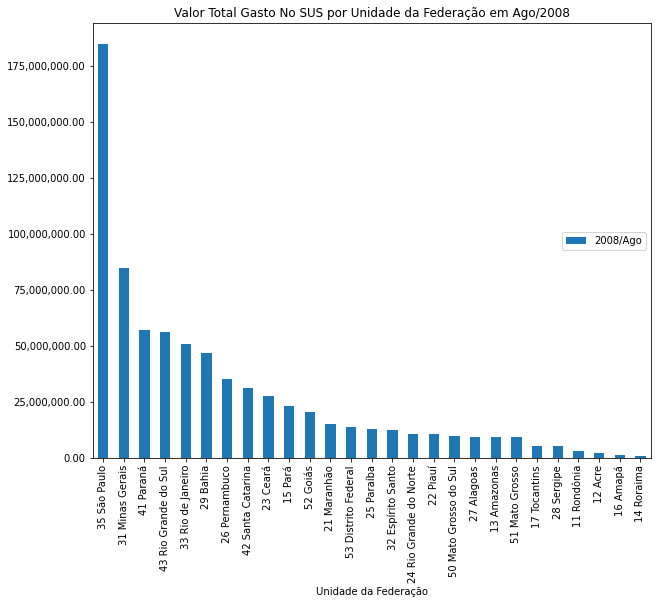

In [ ]:
# Fazendo uma gráfico de barras com o Pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.sort_values("2008/Ago", ascending = False).plot(x = "Unidade da Federação", y = "2008/Ago", kind = "bar", figsize = (10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor Total Gasto No SUS por Unidade da Federação em Ago/2008")
# Usar o plt.legend para posicionar a legenda em algum local do gráfico
plt.legend(loc = 'right')
plt.show()

#### Desafio 1: Escolher um título mais descritivo que passe a mensagem adequada

  R: Feito no gráfico acima. Também decidi ordenar o gráfico de forma que possamos comparar o estados. Assim fica claro a ordem e podemos tirar conclusões de forma mais fácil


#### Desafio 2: Faça a mesma análise para o mês mais recente

In [ ]:
# Visualizando qual é o mês mais recente.
dados.columns[-1]

'Total'

In [ ]:
# Deletando a coluna total
dados = dados.drop("Total", axis = 1 )

In [ ]:
# Agora sim, selecionando o mes mais recente
mes_mais_recente = dados.columns[-1]

In [ ]:
# Não tem dados na coluna na coluna de indice 1, referente ao Acre, isso vai dar erro na hora de plotar o gráfico 
dados[[mes_mais_recente, "Unidade da Federação"]].head()

,2020/Ago,Unidade da Federação
0,10285455.78,11 Rondônia
1,-,12 Acre
2,14726443.67,13 Amazonas
3,2826486.18,14 Roraima
4,39911193.02,15 Pará


In [ ]:
#Excluindo a coluna do Acre
dados = dados[[mes_mais_recente, "Unidade da Federação"]].drop(1)

In [ ]:
# Convertendo para Float
dados[mes_mais_recente] = dados[mes_mais_recente].astype(float)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2020/Ago              26 non-null     float64
 1   Unidade da Federação  26 non-null     object 
dtypes: float64(1), object(1)
memory usage: 624.0+ bytes


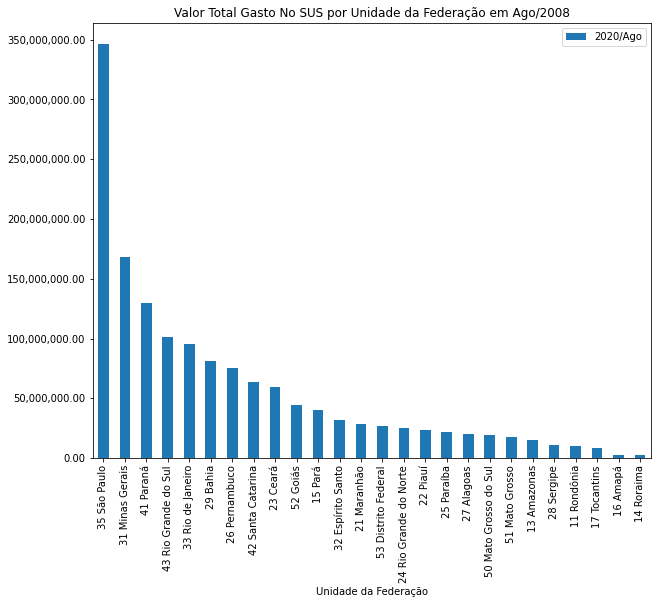

In [ ]:
ax = dados.sort_values(mes_mais_recente, ascending = False).plot(x = "Unidade da Federação", y = mes_mais_recente, kind = "bar", figsize = (10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor Total Gasto No SUS por Unidade da Federação em Ago/2008")
plt.show()

### Aula 2

Primeiras Visualizações de Dados

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'

In [ ]:
dados = pd.read_csv(url, encoding = "ISO-8859-1",
                    skiprows = 3, sep = ";", skipfooter = 12,
                    thousands = ".", decimal = ",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [ ]:
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,11958647088.33
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2172157981.36
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2036923784.59
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,36473617.92,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4657348958.66
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2429933198.76


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [ ]:
dados['2008/Ago'].mean()

26636409.892222222

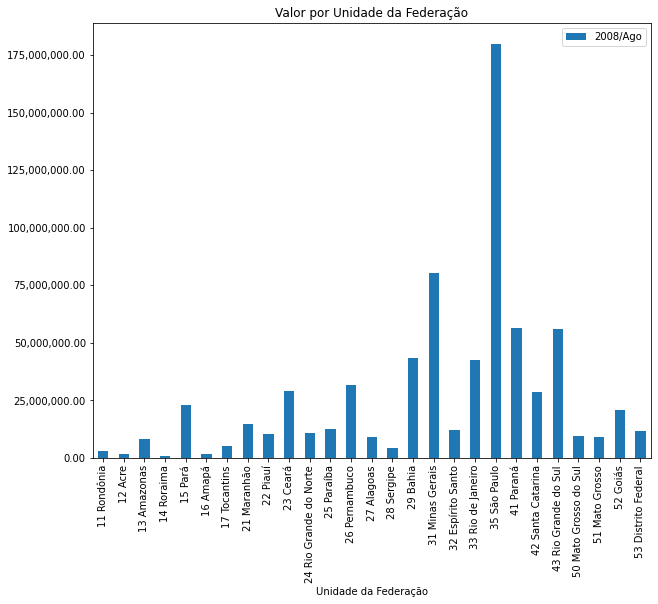

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x = "Unidade da Federação", y = "2008/Ago", kind = "bar", figsize = (10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por Unidade da Federação")
plt.show()

In [ ]:
# Selecionando duas colunas
dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [ ]:
# Vamos selecionar apenas as colunas que tem todos os valores
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [ ]:
# Selecionando as colunas que tem todos os valores
colunas_usaveis = dados.mean().index.tolist()
# Inserindo o "Unidade da Federação" na lista
colunas_usaveis.insert(0, "Unidade da Federação")


In [ ]:
usaveis = dados[colunas_usaveis]

In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")


In [ ]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [ ]:
# Localiza pelo nome da linha
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

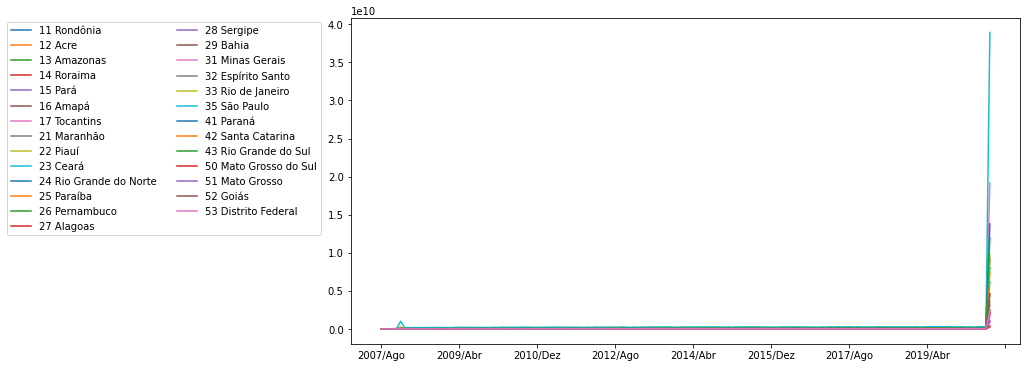

In [ ]:
usaveis.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor = (0.00001,1.08), loc = 'upper right', borderaxespad=3, ncol = 2)
plt.show()

In [ ]:
usaveis = usaveis.drop("Total", axis = 1)

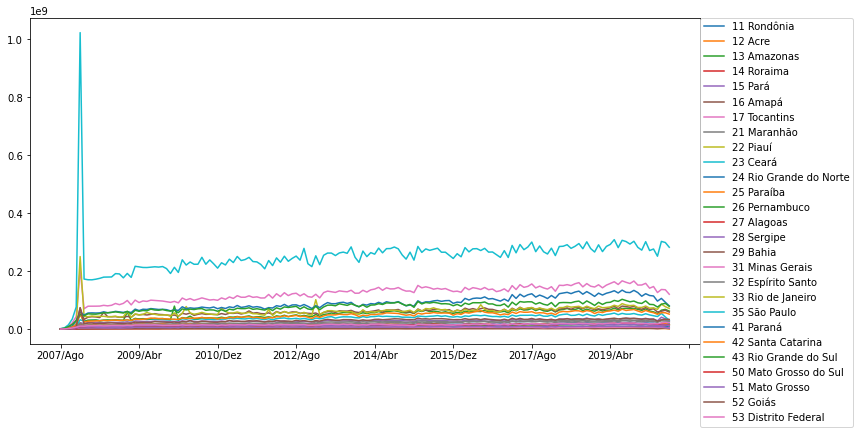

In [ ]:
usaveis.T.plot(figsize = (12,6))
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left', borderaxespad=0)

#### Desafio 1: reposicionar a legenda. Dentro? Fora? Onde

R: para reposicionar a legenda, usamos o plt.legend. Para posicionar fora do gráfico, basta adicionar o argumento bbox_to_anchor. Alguns exemplos nos gráficos acima

#### Desafio 2: Plotar o gráfico de linha com apenas 5 estados de sua preferência

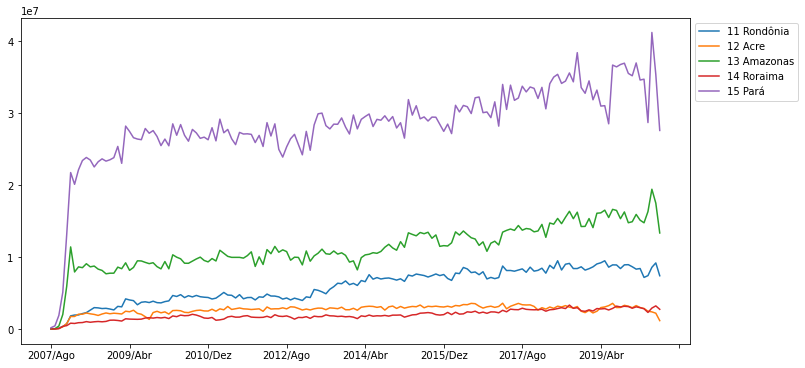

In [ ]:
# Selecionando os 5 primeiros
usaveis.head(5).T.plot(figsize =  (12,6))
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')

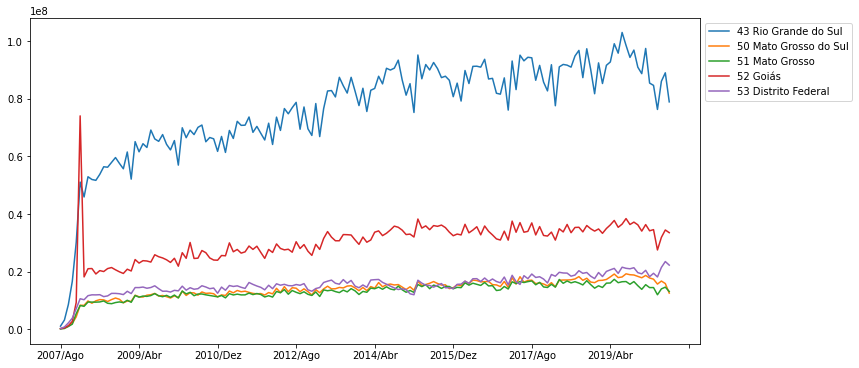

In [ ]:
# Selecionando os 5 últimos
usaveis.tail(5).T.plot(figsize =  (12,6))
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')

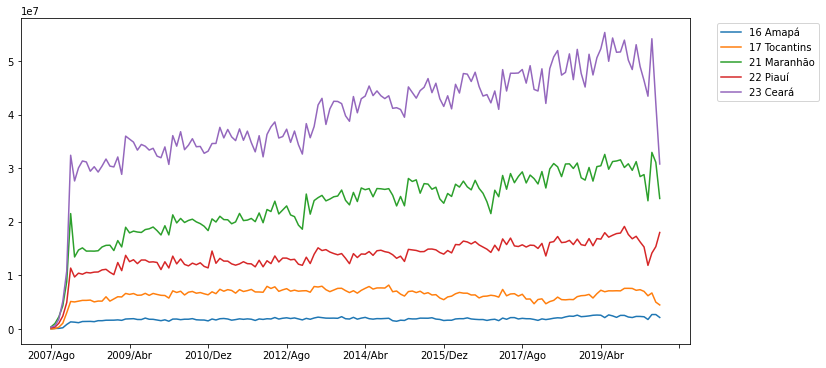

In [ ]:
# Selecionando um intervalo, plotando do 5 ao décimo
estados_selecionados = usaveis.index[5:10]
usaveis.T[estados_selecionados].plot(figsize = (12,6))
plt.legend(bbox_to_anchor = (1.20,1), loc = 'upper right')

In [ ]:
# Selecionando os estados do norte
estados_norte = list()
for x in range(0,27):
  if(usaveis.index[x][0] == '1'):
    estados_norte.append(usaveis.index[x])

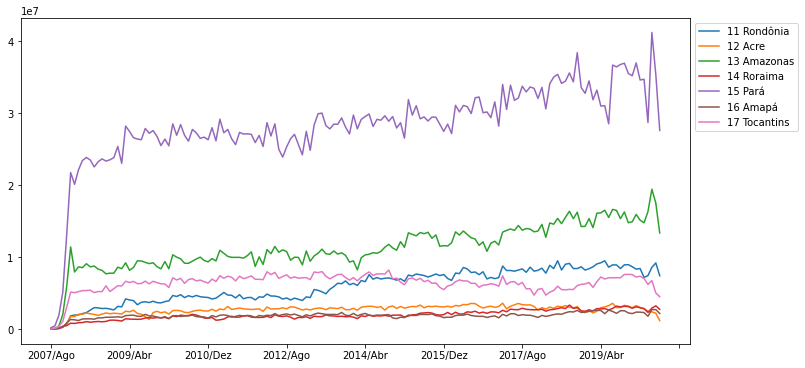

In [ ]:
usaveis.T[estados_norte].plot(figsize = (12,6))
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left')

### Aula 3

Manipulação de Dados

In [ ]:
usaveis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
# Selecionando um "slice" das colunas
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [ ]:
# mesma coisa, só que sem transpor a base de dados
usaveis.index[1:4]

Index(['12 Acre', '13 Amazonas', '14 Roraima'], dtype='object', name='Unidade da Federação')

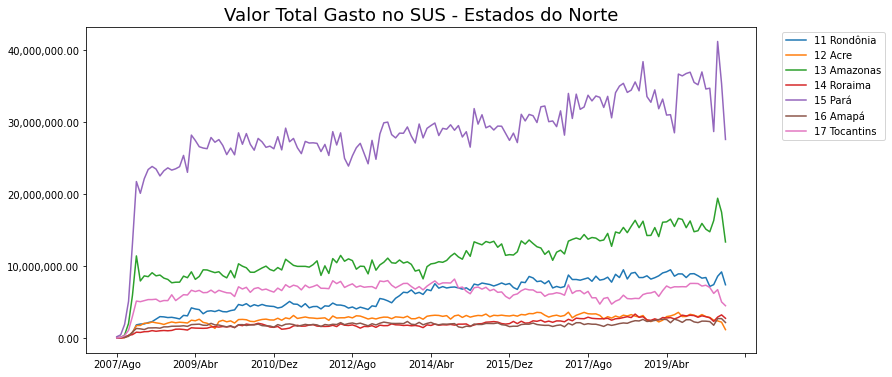

In [ ]:
ax = usaveis[:7].T.plot(figsize=(12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor Total Gasto no SUS - Estados do Norte", {'fontsize': 18})
plt.legend(bbox_to_anchor = (1.2,1), loc = "upper right")
plt.show()

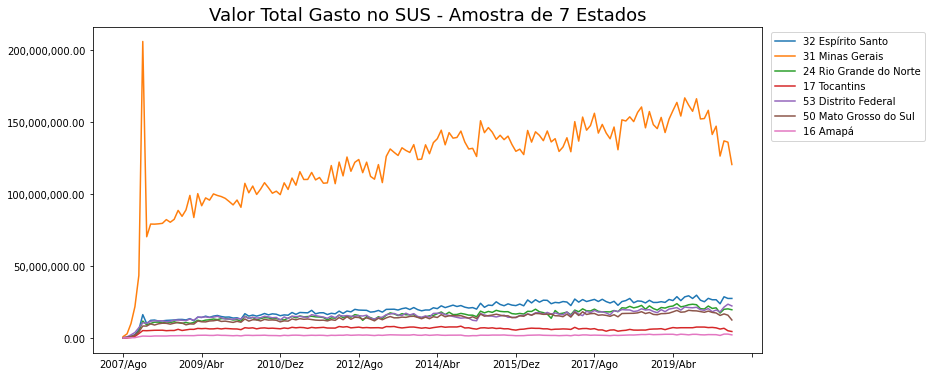

In [ ]:
import numpy as np
np.random.seed(687942)


ax = usaveis.sample(n=7).T.plot(figsize = (12,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor Total Gasto no SUS - Amostra de 7 Estados", {'fontsize':18})
plt.legend(bbox_to_anchor = (1.25,1), loc = "upper right")
plt.show()

In [ ]:
# Dica de como adicionar coluna 
usaveis["Total"] = usaveis.sum(axis = 1)

In [ ]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [ ]:
ordenado_por_total = usaveis.sort_values("Total", ascending = False)

In [ ]:
ordenado_por_total = ordenado_por_total.drop("Total", axis = 1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.

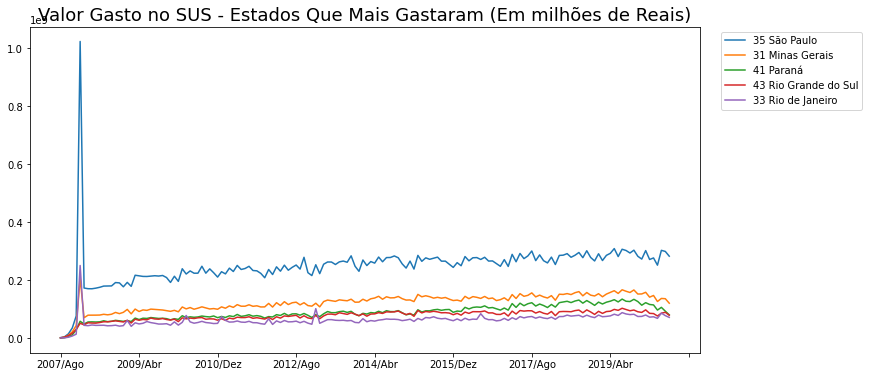

In [ ]:
ordenado_por_total.head(5).T.plot(figsize=(12,6))
plt.title("Valor Gasto no SUS - Estados Que Mais Gastaram (Em milhões de Reais)", {'fontsize': 18})
plt.legend(bbox_to_anchor = (1.25,1), loc = 'upper right')
plt.show()

In [ ]:
# Temos um problema em jan/2008. Como é a data de início do processamento, muitos procedimentos sem data foram atribuídos a essa data. Então o gasto em Jan/2008 é explosivo
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

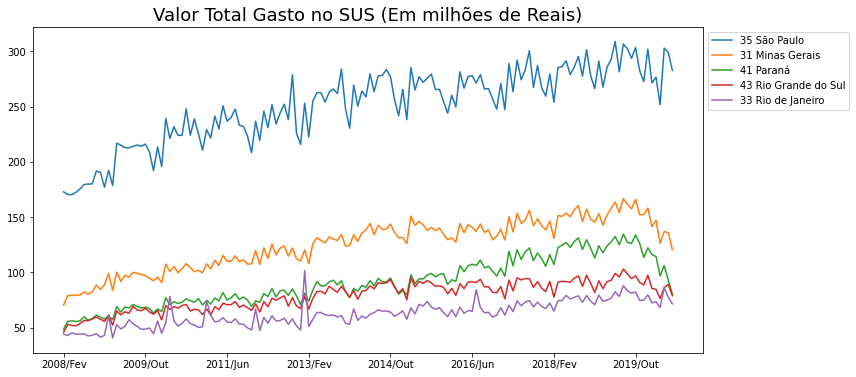

In [ ]:
ordenado_por_total = ordenado_por_total/1000000
ordenado_por_total.head(5).T.plot(figsize= (12,6))
plt.title("Valor Total Gasto no SUS (Em milhões de Reais)", {'fontsize':18})
plt.legend(bbox_to_anchor = (1,1))
plt.show()

#### Desafio 1: Mudar a palete de cores com o matplotlib

R: Perguntar na próxima live de monitoria

#### Desafio 2: Criar uma coluna a mais, com a região de cada estado

In [ ]:
#criando a coluna vazia
usaveis['regiao'] = ''

In [ ]:
import warnings
warnings.filterwarnings('ignore')

for x in range(0,27):
  if(usaveis.index[x][0] == '1'):
    usaveis["regiao"][x] = "Norte"

  elif(usaveis.index[x][0] == '2'):
    usaveis["regiao"][x] = "Nordeste"

  elif(usaveis.index[x][0] == '3'):
    usaveis["regiao"][x] = "Sudeste"

  elif(usaveis.index[x][0] == '4'):
    usaveis["regiao"][x] = "Sul"

  elif(usaveis.index[x][0] == '5'):
    usaveis["regiao"][x] = "Centro-Oeste"

In [ ]:
usaveis.sample(5).head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,30454606.34,32082203.52,29845655.79,34921069.20,33677499.55,34053483.16,35685005.53,38337704.14,37110055.24,36516827.06,36207968.50,35451417.03,34360136.47,34093173.06,33608566.26,38776130.28,36705001.71,38085803.13,37686277.05,38574085.03,40256188.61,37840220.77,38963855.34,38297339.52,...,58296066.50,58362424.47,60181080.42,55168339.49,56655278.59,56069454.96,52426527.16,55200330.53,50094672.65,58796191.84,61160709.55,60093810.34,61237932.18,63709506.55,63061083.41,59354217.40,63961626.64,61553236.70,53908557.78,59452473.88,57176215.74,61547622.60,62756764.33,65813210.22,61817516.05,68759673.19,64503540.72,66075691.36,67767419.13,62635827.71,58210191.51,64546099.76,59549208.75,56709962.09,51179993.45,56843604.33,56503747.99,51764534.76,7306969709.51,Sul
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,...,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,9659938007.12,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,19102100731.94,Sudeste
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,19053

#### Desafio 3: Deixar o gráfico mais bonito

R: Feito nos gráficos da aula 3 acima

#### Desafio 4: Adicione o seu estado aos 5 estados existentes e plote. Que não seja os 6 primeiros

R: Como meu estado já está entre os 5 (Rio de Janeiro), vou adicionar Sergipe

In [ ]:
# Criando uma lista com o Sergipe
estados_selecionados = ["28 Sergipe"]


In [ ]:
# Adicionando os 5 estados que mais gastaram a lista
for x in range(0,5):
  estados_selecionados.append(ordenado_por_total.head(5).index[x])

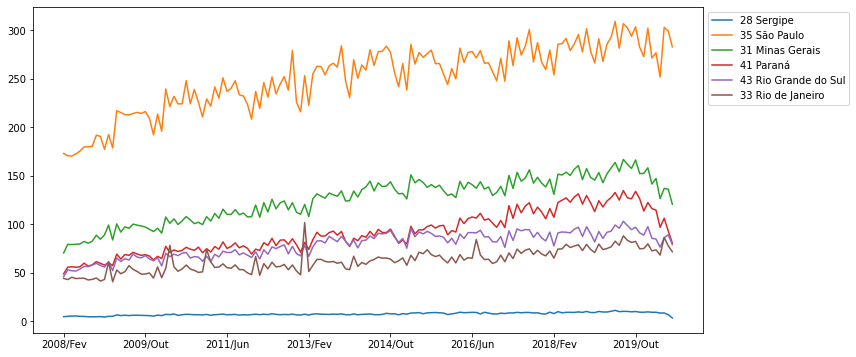

In [ ]:
# Fazendo o gráfico
ordenado_por_total.T[estados_selecionados].plot(figsize = (12,6))
plt.legend(bbox_to_anchor = (1,1))
plt.show()

#### Desafio 5: plotar só os estados do sudeste e ver se afetou com um pico em 2012/2013 de forma similar esses estados

R: Apenas Rio de Janeiro e São Paulo tiveram picos visíveis no gráfico entre 2012/2013. Isso pode estar relacionado com alguma crise sanitária. Talvez uma epidemia forte de dengue

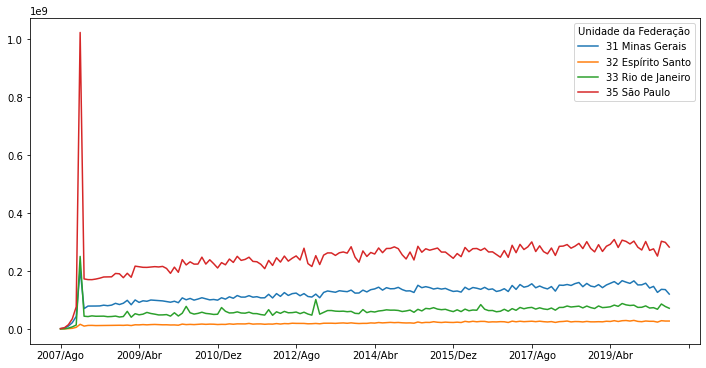

In [ ]:
usaveis[usaveis["regiao"] == "Sudeste"].T.drop("regiao").drop("Total").plot(figsize= (12,6))

### Aula 4

Análise de Gráficos de Criação de Hipóteses

É preciso tomar cuidado com as conclusões que tomammos ao analisar um gráfico. Pois o que é aparente, nem sempre representa a realidade. Ao mudar os valores do eixos, selecionar apenas uma janela especifica ou até mesmo alterando o tamanho dos graficos, podemos passar mensagens distintas. Por isso existem métricas que serão utilizadas para melhor entendimento das séries temporais, como taxa de crescimento, média móvel, dentre outras. Essas métricas seram aprofundadas no módulo 3, de séries temporais

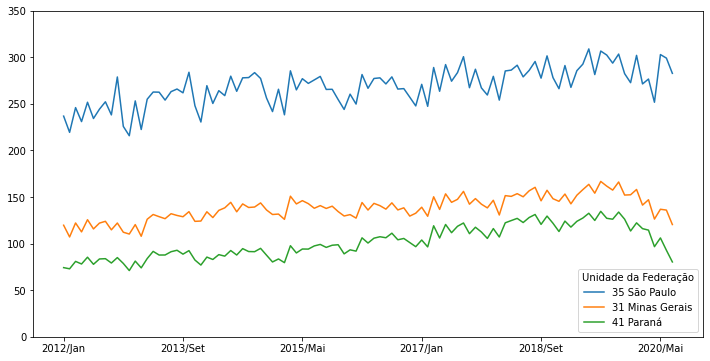

In [ ]:
meses_filtrados = ordenado_por_total.columns[47:150]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize= (12,6))
plt.ylim(0, 350)
plt.show()

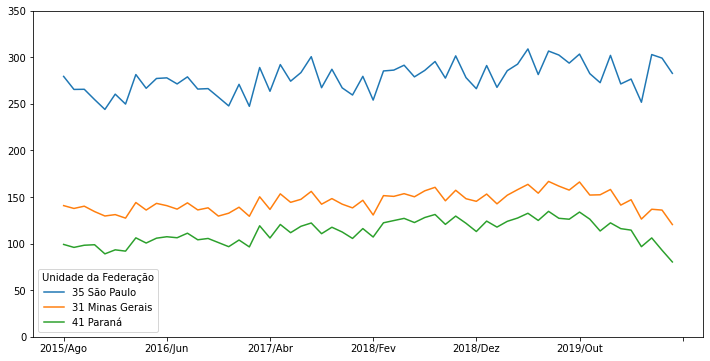

In [ ]:
meses_filtrados = ordenado_por_total.columns[-60:]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize= (12,6))
plt.ylim(0, 350)
plt.show()

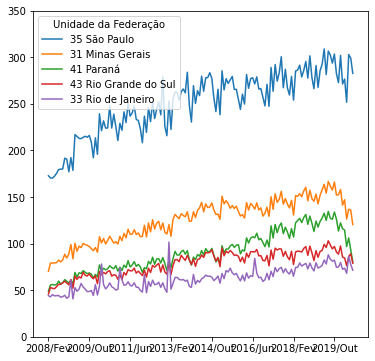

In [ ]:

ordenado_por_total.head(5).T.plot(figsize= (6,6))
plt.ylim(0, 350)
plt.show()

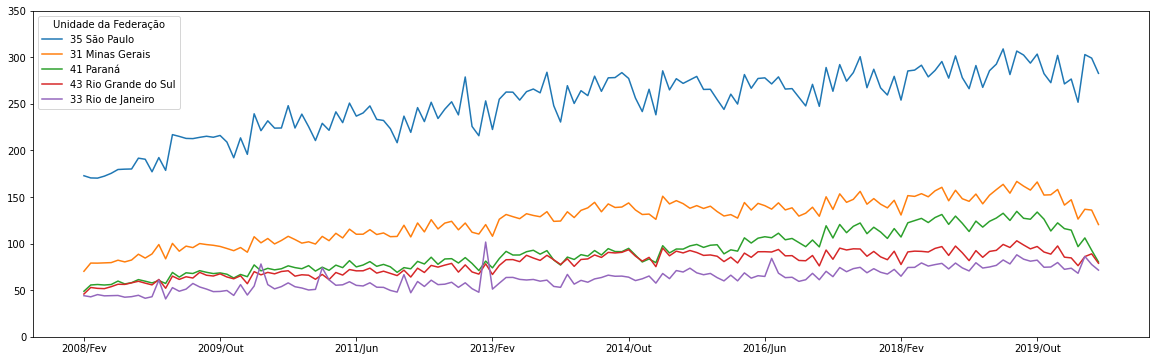

In [ ]:
ordenado_por_total.head(5).T.plot(figsize= (20,6))
plt.ylim(0, 350)
plt.show()

 #### Desafio 01: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações 
 #### Desafio 02: Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

Mudando a escala do eixo y, contamos uma história diferente. Desse modo, parece que a "distância" entre os gastos de São Paulo e Paraná é bem menor

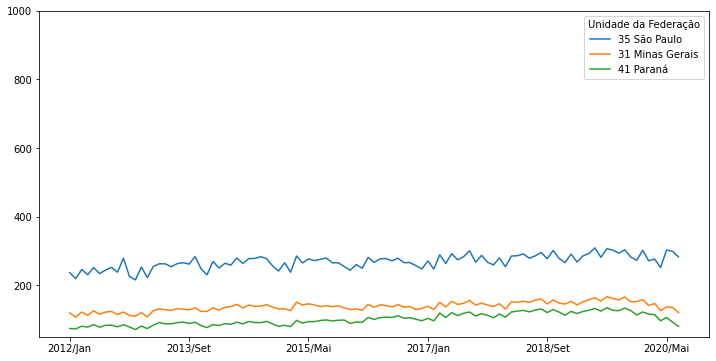

In [ ]:

meses_filtrados = ordenado_por_total.columns[47:150]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize= (12,6))
plt.ylim(50, 1000)
plt.show()

Nada mudou nos dados, mas veja que a minupulação fez com que agora a "distância" entre São Paulo e Paraná seja muito maior

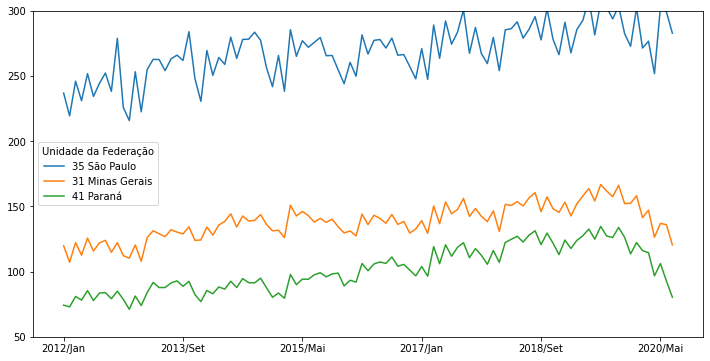

In [ ]:

meses_filtrados = ordenado_por_total.columns[47:150]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize= (12,6))
plt.ylim(50, 300)
plt.show()

Outra forma de alterar o gráfico, é fazendo alterações no eixo x e dessa forma, passamos impressões diferente
Selecionando apenas os últimos 12 meses, parece que há uma tendência de queda nos gráficos. Mas será que isso é verdadeiro
Primeiramente precisamos considerar a natureza dos dados que estamos analisando. Sabendo esses dados mudam com o tempo
pois mais procedimentos que aconteceram nessas datas serão processados após algum tempo. Então esses valores aumentam

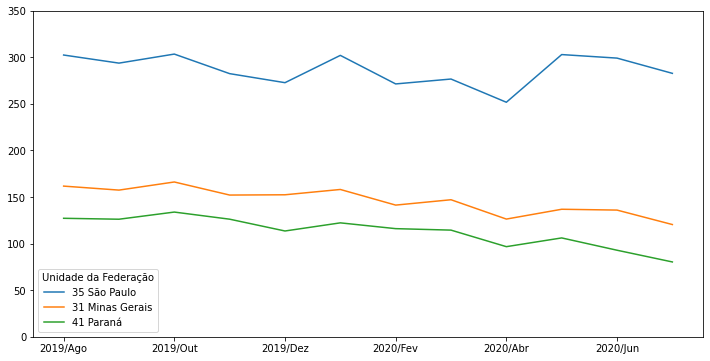

In [ ]:

meses_filtrados = ordenado_por_total.columns[-12:]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize= (12,6))
plt.ylim(0, 350)
plt.show()

Ademais, vemos que na realidade há uma tendência de aumento (o que é esperado dado o aumento da população). 
Ou seja, ou selecionarmos diferentes valores para o eixo x, também podemos alterar a mensagem que o gráfico passa

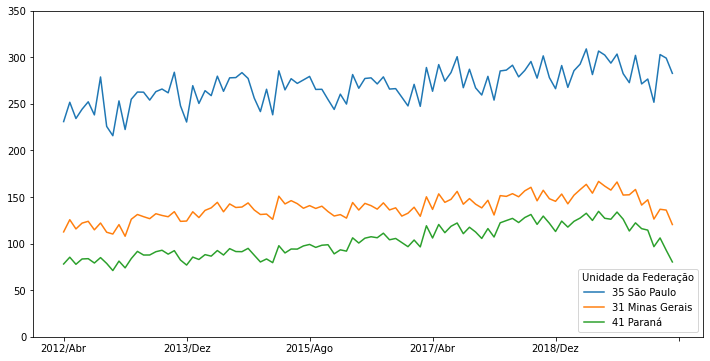

In [ ]:
# Ademais, vemos que na realidade há uma tendência de aumento (o que é esperado dado o aumento da população). 
# Ou seja, ou selecionarmos diferentes valores para o eixo x, também podemos alterar a mensagem que o gráfico passa
meses_filtrados = ordenado_por_total.columns[-100:]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize= (12,6))
plt.ylim(0, 350)
plt.show()


Por último, uma outra forma de manipular os dados é alterando o tamanho do mesmo. Nesse caso, fazendo um gráfico pequeno quadrado, passamos a impressão de há uma tendência de subida acentuada dos dados

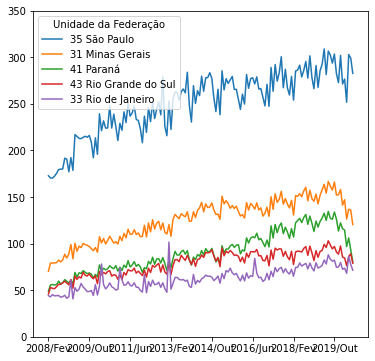

In [ ]:
ordenado_por_total.head(5).T.plot(figsize= (6,6))
plt.ylim(0, 350)
plt.show()

Entretanto, se mudarmos o tamanho do gráfico, para maior e retangular, parece que o crescimento é bem mais suave

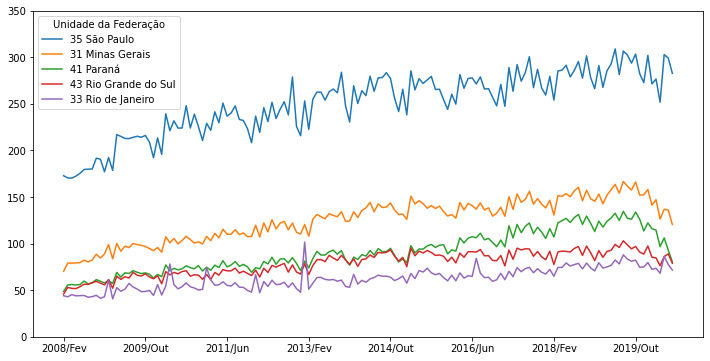

In [ ]:
ordenado_por_total.head(5).T.plot(figsize= (12,6))
plt.ylim(0, 350)
plt.show()

Conclusão: É preciso tomar cuidado com a história que você quer contar com os gráficos. Além disso, é essencial o cuidado para que as manipulações não criem uma impressão que difere da realidade. Portanto, é desejável o uso de métricas para avaliar diferentes aspectos da série de dados, como por exemplo a taxa de crescimento.

### Aula 5

Manipulação e interpretação de gráficos

In [ ]:
# Pegando o último mês 
mes_mais_recente = ordenado_por_total.columns[-1]

In [ ]:
gastos_mais_recentes = ordenado_por_total[mes_mais_recente]
gastos_mais_recentes.sort_values()

Unidade da Federação
12 Acre                    1.16
16 Amapá                   2.16
14 Roraima                 2.74
28 Sergipe                 3.31
17 Tocantins               4.49
11 Rondônia                7.41
50 Mato Grosso do Sul     12.51
51 Mato Grosso            13.08
27 Alagoas                13.09
13 Amazonas               13.36
25 Paraíba                15.49
22 Piauí                  18.02
24 Rio Grande do Norte    19.59
53 Distrito Federal       22.23
21 Maranhão               24.37
32 Espírito Santo         27.46
15 Pará                   27.62
23 Ceará                  30.81
52 Goiás                  33.50
42 Santa Catarina         51.76
29 Bahia                  58.90
26 Pernambuco             62.33
33 Rio de Janeiro         71.54
43 Rio Grande do Sul      78.93
41 Paraná                 80.32
31 Minas Gerais          120.47
35 São Paulo             282.71
Name: 2020/Jul, dtype: float64

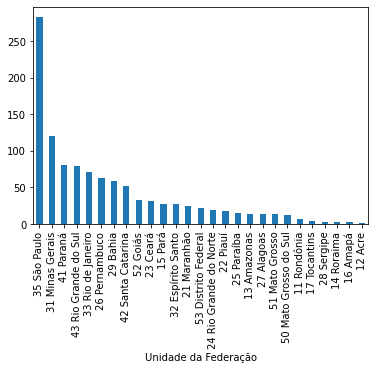

In [ ]:
gastos_mais_recentes.sort_values(ascending = False).plot(kind='bar')

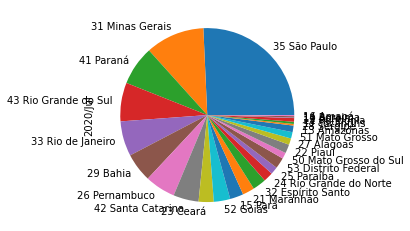

In [ ]:
# Se o gráfico tem nome de comida, você não deve usar kkkk
gastos_mais_recentes.plot(kind = 'pie')

Horrores da Pizza:
- Legenda está horrível
- Número de fatias inacreditável 
- Não sei a proporção
- Muito ruim para comparar
- Péssimo para saber valor absoluto
- Cores repetidas

Temos uma vantagem:
- O gráfico veio ordenado (pois a base de dados estava ordenada)

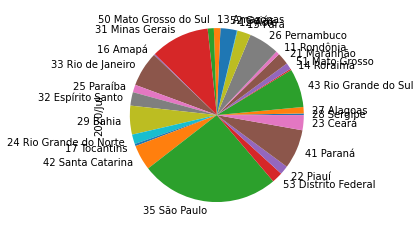

In [ ]:
# Agora fazendo em ordem aleatória. Impossível ter noção da ordem crescente ou decrescente
gastos_mais_recentes.sample(frac = 1).plot(kind = 'pie')

In [ ]:
# Visualização simples para valor absoluto

gastos_mais_recentes.sort_values(ascending=False)

Unidade da Federação
35 São Paulo             282.71
31 Minas Gerais          120.47
41 Paraná                 80.32
43 Rio Grande do Sul      78.93
33 Rio de Janeiro         71.54
26 Pernambuco             62.33
29 Bahia                  58.90
42 Santa Catarina         51.76
52 Goiás                  33.50
23 Ceará                  30.81
15 Pará                   27.62
32 Espírito Santo         27.46
21 Maranhão               24.37
53 Distrito Federal       22.23
24 Rio Grande do Norte    19.59
22 Piauí                  18.02
25 Paraíba                15.49
13 Amazonas               13.36
27 Alagoas                13.09
51 Mato Grosso            13.08
50 Mato Grosso do Sul     12.51
11 Rondônia                7.41
17 Tocantins               4.49
28 Sergipe                 3.31
14 Roraima                 2.74
16 Amapá                   2.16
12 Acre                    1.16
Name: 2020/Jul, dtype: float64

In [ ]:
gastos_mais_recentes / gastos_mais_recentes.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

In [ ]:
(gastos_mais_recentes / gastos_mais_recentes.loc["33 Rio de Janeiro"]).head(5)

Unidade da Federação
35 São Paulo           3.95
31 Minas Gerais        1.68
41 Paraná              1.12
43 Rio Grande do Sul   1.10
33 Rio de Janeiro      1.00
Name: 2020/Jul, dtype: float64

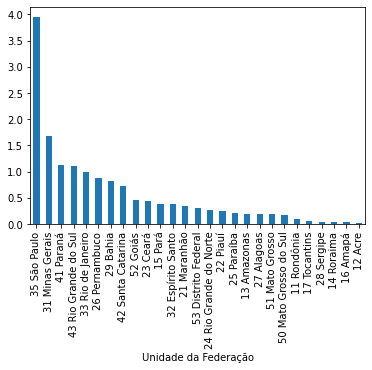

In [ ]:
(gastos_mais_recentes / gastos_mais_recentes.loc["33 Rio de Janeiro"]).sort_values(ascending = False).plot(kind='bar')
plt.show()

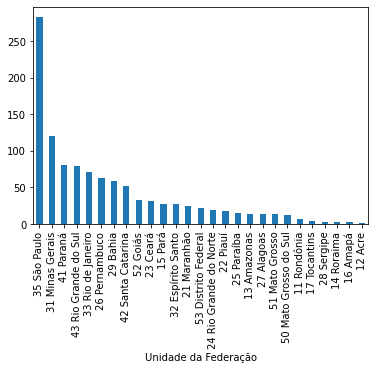

In [ ]:
gastos_mais_recentes.sort_values(ascending = False).plot(kind = 'bar')
plt.show()

#### Desafio 1: Criar a tabela de comparação com o seu estado de preferência

R: Estado selecionado é o Sergipe. O Sergipe é um dos estados que menos gastam. O Piauí, por exemplo, gasta aproximadamente 5.5x mais que o estado do Sergipe. O Estado de São Paulo gasta oitenta vezes mais!!

In [ ]:
(gastos_mais_recentes / gastos_mais_recentes.loc["28 Sergipe"]).tail(10)

Unidade da Federação
22 Piauí         5.44
27 Alagoas       3.95
51 Mato Grosso   3.95
13 Amazonas      4.03
28 Sergipe       1.00
17 Tocantins     1.36
11 Rondônia      2.24
12 Acre          0.35
14 Roraima       0.83
16 Amapá         0.65
Name: 2020/Jul, dtype: float64

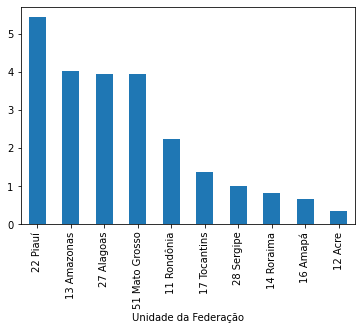

In [ ]:
(gastos_mais_recentes / gastos_mais_recentes.loc["28 Sergipe"]).tail(10).sort_values(ascending = False).plot(kind = 'bar')

#### Desafio 2: Colocar grid no gráfico

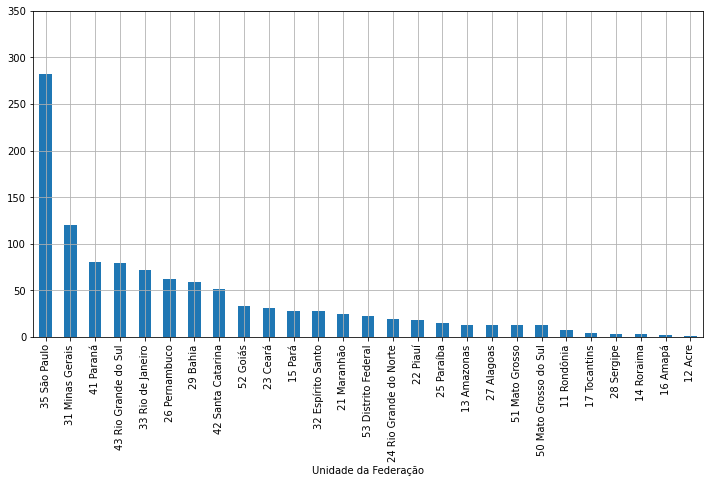

In [ ]:
gastos_mais_recentes.sort_values(ascending = False).plot(kind = 'bar', figsize = (12,6))
# Adiciona Grid no gráfico
plt.grid()
plt.ylim(0,350)
plt.show()

#### Desafio 3: Gráfico de barra do gasto dos outros estados em função ao seu estado

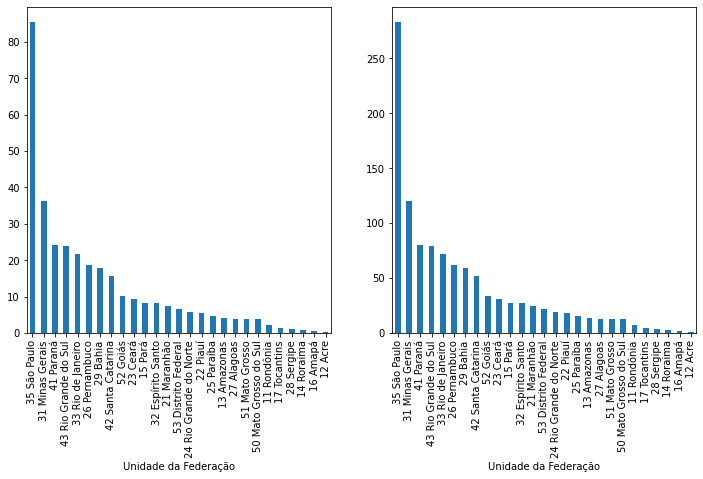

In [ ]:
# O gráfico fica exatamente com o mesmo formato. Para facilitar a colocarei eles lado a lado

from matplotlib import gridspec

fig = plt.figure(figsize = (15,10))
specs = gridspec.GridSpec(ncols = 2, nrows = 1, figure = fig)

ax1 = fig.add_subplot(specs[0,0]) #Primeira linha, primeira coluna
ax2 = fig.add_subplot(specs[0,1]) #Primeira linha, segunda coluna

# Gráfico 1
(gastos_mais_recentes/gastos_mais_recentes.loc["28 Sergipe"]).sort_values(ascending = False).plot(kind = 'bar', figsize = (12,6), ax = ax1)

# Gráfico 2
gastos_mais_recentes.sort_values(ascending = False).plot(kind = 'bar', figsize = (12,6), ax = ax2)

#### Desafio 4: Seu gasto por população de dois estados. Escolha dois estados. Gráfico de barras

In [ ]:
# População dos estados selecionados 
populacao_sp = 46649132
populacao_rio = 17463349


In [ ]:
# Verificando o tipo.
type(populacao_sp)

int

In [ ]:
#criando um novo conjunto de dados
gastos_por_população = gastos_mais_recentes.loc[["35 São Paulo", "33 Rio de Janeiro"]] * 1000000
gastos_por_população

Unidade da Federação
35 São Paulo        282709570.31
33 Rio de Janeiro    71540227.33
Name: 2020/Jul, dtype: float64

In [ ]:
# Calculado e atribuindo o gasto por população de São Paulo
gastos_por_população.loc["35 São Paulo"] = (gastos_por_população.loc["35 São Paulo"]/populacao_sp)
gastos_por_população

Unidade da Federação
35 São Paulo               6.06
33 Rio de Janeiro   71540227.33
Name: 2020/Jul, dtype: float64

In [ ]:
# Calculado e atribuindo o gasto por população de São Paulo
gastos_por_população.loc["33 Rio de Janeiro"] = gastos_por_população.loc["33 Rio de Janeiro"]/populacao_rio
gastos_por_população

Unidade da Federação
35 São Paulo        6.06
33 Rio de Janeiro   4.10
Name: 2020/Jul, dtype: float64

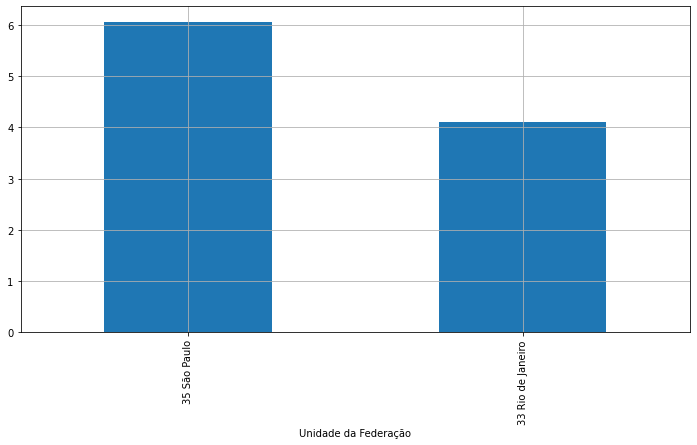

In [ ]:
gastos_por_população.plot(kind = 'bar', figsize = (12,6))
plt.grid()
plt.show()

## Módulo 2

Visualização de dados com Seaborn e Matplotlib

### Aula 1

Fontes externas, limpeza e manipulação

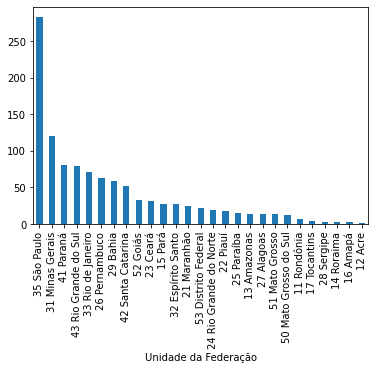

In [ ]:
gastos_mais_recentes.sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [ ]:
# Calculando o gasto proporcional ao pais todo

gastos_proporcionais = gastos_mais_recentes / gastos_mais_recentes.sum()

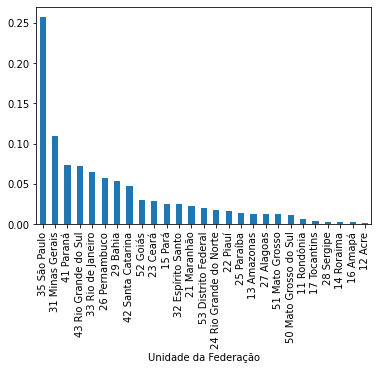

In [ ]:
gastos_proporcionais.sort_values(ascending=False).plot(kind='bar')

In [ ]:
ibge_estimativa = pd.read_excel('https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls')
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


In [ ]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 649 132	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 411 923	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 463 349	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 985 284	7,1%	 Chade (14 037 000)
5	 Paraná	11 597 484	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 466 630	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 674 793	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 240 580	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 777 124	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 338 473	3,4%	 Sérvia (7 114 393)
11	 Goiás	7 206 589	3,4%	 Paraguai (7 003 406)
12	 Maranhão	7 153 262	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 269 995	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 108 508	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 059 905	1,9%	 Líbano (4 168 000)
16	 Mato Grosso	3 567 234	1,7%	 Uruguai (3 415 866)
17	 Rio Grande do Norte	3 560 903	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 365 351	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 289 290	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 094 325	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 839 188	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 338 474	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 815 278	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 607 363	0,7%	 Bahrein (1 359 800)
25	 Acre	906 876	0,4%	 Fiji (859 178)
26	 Amapá	877 613	0,4%	 Fiji (859 178)
27	 Roraima	652 713	0,3%	 Luxemburgo (562 958)"""

In [ ]:
from io import StringIO

# Dessa forma eu crio um "leitor" para os dados 
dados_da_populacao_io = StringIO(dados_da_populacao)

# E agora podemos ler esses dados com o pd.read_csv
populacao = pd.read_csv(dados_da_populacao_io, sep = '\t')
populacao.head()

# Retirando a primeira linha com o drop na
populacao = populacao.dropna()

# Criando novas colunas com os nomes desejados e tirando o espaço com replace. Só que temos que colocar o str
# O pandas tem o próprio replace, e para indicar que queremos usar o replace de strings, temos que por o .str
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]

#Pegando apenas as colunas que interessam
populacao = populacao[["populacao", "uf"]].set_index("uf")
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia Bahia,14985284
Paraná,11597484


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [ ]:
gastos_mais_recentes.index = gastos_mais_recentes.index.str[3:]
gastos_mais_recentes.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [ ]:
# Ainda não funciona, ou seja, existe mais um problema
populacao.join(gastos_mais_recentes).head()

,populacao,2020/Jul
uf,,
São Paulo,46649132,nan
Minas Gerais,21411923,nan
Rio de Janeiro,17463349,nan
Bahia Bahia,14985284,nan
Paraná,11597484,nan


In [ ]:
# Procurando São Paulo com o loc. Dá erro, pois não temos o "São Paulo"
# populacao.loc["São Paulo"]

In [ ]:
# Ao fazer isso, vemos que tem um espaço no início
populacao.index[0]

' São Paulo'

In [ ]:
# Usando o strip, tiramos os espaços na frente e atrás 
populacao.index[0].strip()

'São Paulo'

In [ ]:
# Tirando os espaços
populacao.index = populacao.index.str.strip()
populacao.head()

,populacao
uf,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia Bahia,14985284
Paraná,11597484


In [ ]:
# Tentando dar Join novamente
populacao.join(gastos_mais_recentes).head()

,populacao,2020/Jul
uf,,
São Paulo,46649132,282.71
Minas Gerais,21411923,120.47
Rio de Janeiro,17463349,71.54
Bahia Bahia,14985284,nan
Paraná,11597484,80.32


In [ ]:
# Agora sim resolvemos o problema
for estado in gastos_mais_recentes.index:
  # print(f"{estado} {estado} => {estado}")
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)

populacao.index


Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Mato Grosso', 'Rio Grande do Norte', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [ ]:
gastos_e_populacao = populacao.join(gastos_mais_recentes)
gastos_e_populacao.head()

,populacao,2020/Jul
uf,,
São Paulo,46649132,282.71
Minas Gerais,21411923,120.47
Rio de Janeiro,17463349,71.54
Bahia,14985284,58.90
Paraná,11597484,80.32


#### Desafio 1: Ler esse arquivo direto da Wikipedia (html)

In [ ]:
# Podemos ler uma tabela html usando o pd.read_html. Simples assim
tabela = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
# Ele agrupa todas as tabelas de uma página em uma especie de dicionário de tabelas. A tabela que queremos é a primeira então tabela = tabela[0]
tabela = tabela[0]
# Mostrando a tabela
tabela

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 649 132,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 411 923,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 463 349,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 985 284,"7,1%",Chade (14 037 000)
4,5,Paraná,11 597 484,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 466 630,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 674 793,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 240 580,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 777 124,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 338 473,"3,4%",Sérvia (7 114 393)


#### Desafio 2: Explorar mais métodos de String do python e str do pandas

str do Pandas permite aplicar uma série de funções de string em uma série do Pandas

In [ ]:
s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaSe'])

In [ ]:
s.str.capitalize()

0                 Lower
1              Capitals
2    This is a sentence
3              Swapcase
dtype: object

In [ ]:
s.str.lower()

0                 lower
1              capitals
2    this is a sentence
3              swapcase
dtype: object

In [ ]:
s.str.upper()

0                 LOWER
1              CAPITALS
2    THIS IS A SENTENCE
3              SWAPCASE
dtype: object

In [ ]:
s.str.title()

0                 Lower
1              Capitals
2    This Is A Sentence
3              Swapcase
dtype: object

In [ ]:
s.str.swapcase()

0                 LOWER
1              capitals
2    THIS IS A SENTENCE
3              sWaPcAsE
dtype: object

Uma string nativa do Python também possui uma série de funções que podem ser aplicadas

In [ ]:
s = " AbaCatE       "

In [ ]:
s.capitalize()

' abacate       '

In [ ]:
s.title()

' Abacate       '

In [ ]:
s.endswith("la")

False

In [ ]:
s.find("a")

3

#### Desafio 3: Estruturar uma função para a leitura e limpeza dessa tabela, devolvendo a tabela populacao e a tabela unida

In [ ]:
def le_tabela(tabela: str):
  from io import StringIO
  tabela_io = StringIO(tabela)
  populacao = pd.read_csv(tabela_io, sep = '\t')
  populacao = populacao.dropna()
  populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
  populacao["uf"] = populacao["Unidade federativa"]
  populacao = populacao[["populacao", "uf"]].set_index("uf")
  return populacao


In [ ]:
tabela_limpa = le_tabela("""Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 649 132	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 411 923	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 463 349	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 985 284	7,1%	 Chade (14 037 000)
5	 Paraná	11 597 484	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 466 630	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 674 793	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 240 580	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 777 124	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 338 473	3,4%	 Sérvia (7 114 393)
11	 Goiás	7 206 589	3,4%	 Paraguai (7 003 406)
12	 Maranhão	7 153 262	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 269 995	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 108 508	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 059 905	1,9%	 Líbano (4 168 000)
16	 Mato Grosso	3 567 234	1,7%	 Uruguai (3 415 866)
17	 Rio Grande do Norte	3 560 903	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 365 351	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 289 290	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 094 325	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 839 188	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 338 474	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 815 278	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 607 363	0,7%	 Bahrein (1 359 800)
25	 Acre	906 876	0,4%	 Fiji (859 178)
26	 Amapá	877 613	0,4%	 Fiji (859 178)
27	 Roraima	652 713	0,3%	 Luxemburgo (562 958)""")



In [ ]:
tabela_limpa.head()

,populacao
uf,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia Bahia,14985284
Paraná,11597484


In [ ]:
# Quero também uma função para ler tabelas em geral separadas por tab
def le_tabela_geral(tabela: str, sep: str):
  from io import StringIO
  tabela_io = StringIO(tabela)
  tabela_df = pd.read_csv(tabela_io, sep = sep)
  tabela_df = tabela_df.dropna()
  return tabela_df

In [ ]:
# Lendo uma outra tabela da wikipedia
le_tabela_geral("""
Posição	Região	População	% da pop. total	País comparável (habitantes)
1	Região Sudeste	89 632 912	42,04%	 República Democrática do Congo (86 790 567)
2	Região Nordeste	57 667 842	27,09%	 África do Sul (58 775 022)
3	Região Sul	30 402 587	14,26%	 Nepal (29 609 623)
4	Região Norte	18 906 962	8,82%	 Cazaquistão (18 574 680)
5	Região Centro-Oeste	16 707 336	7,79%	 Senegal (16 209 125)
""", '\t')

,Posição,Região,População,% da pop. total,País comparável (habitantes)
0,1,Região Sudeste,89 632 912,"42,04%",República Democrática do Congo (86 790 567)
1,2,Região Nordeste,57 667 842,"27,09%",África do Sul (58 775 022)
2,3,Região Sul,30 402 587,"14,26%",Nepal (29 609 623)
3,4,Região Norte,18 906 962,"8,82%",Cazaquistão (18 574 680)
4,5,Região Centro-Oeste,16 707 336,"7,79%",Senegal (16 209 125)


### Aula 2

Proporcionalidades e Seaborn


In [ ]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos, dados, mes:str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f"gastos_{mes}"] = gastos_do_mes * 1000000
  dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"]/dados["populacao"]

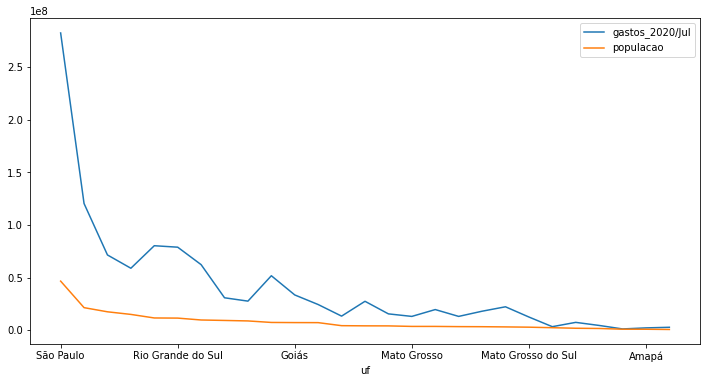

In [ ]:
# Fazendo uma gráfico que não faz muito sentido

ordenado_por_total.index = ordenado_por_total.index.str[3:]
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao, "2020/Jul")
gastos_e_populacao[["gastos_2020/Jul", "populacao"]].plot(figsize = (12,6))

In [ ]:
gastos_e_populacao.head()

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul
uf,,,,
São Paulo,46649132,282.71,282709570.31,6.06
Minas Gerais,21411923,120.47,120467187.34,5.63
Rio de Janeiro,17463349,71.54,71540227.33,4.10
Bahia,14985284,58.90,58898100.40,3.93
Paraná,11597484,80.32,80320852.69,6.93


In [ ]:
gastos_e_populacao.loc[["Rio Grande do Sul","São Paulo"]]

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul
uf,,,,
Rio Grande do Sul,11466630,78.93,78929703.81,6.88
São Paulo,46649132,282.71,282709570.31,6.06


In [ ]:
# Calculando o gasto por população São Paulo
282709570.31/46649132


6.060339350151253

In [ ]:
# Calculando o gasto por população Rio Grande do Sul
78929703.81/11466630

6.8834264129914375

In [ ]:
# Criando a coluna gasto_por_habitante


gastos_e_populacao.head()

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul
uf,,,,
São Paulo,46649132,282.71,282709570.31,6.06
Minas Gerais,21411923,120.47,120467187.34,5.63
Rio de Janeiro,17463349,71.54,71540227.33,4.10
Bahia,14985284,58.90,58898100.40,3.93
Paraná,11597484,80.32,80320852.69,6.93


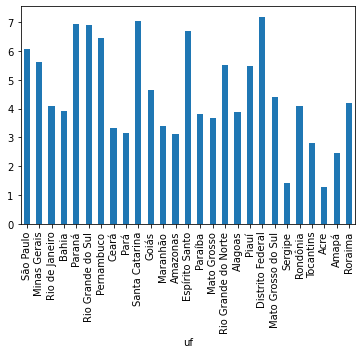

In [ ]:
gastos_e_populacao["gasto_por_habitante_2020/Jul"].plot(kind='bar')

Podemos ver nesse gráfico, que não parece haver uma tendência de que os estados que mais gastam tenham gasto por habitante elevado

Queremos mostrar uma relação entre duas variáveis que são medidas de forma diferente (nesse caso, temos pessoas e gastos monetários). Uma alternativa seria fazer um eixo secundário. Mas essa alternativa não é muito boa, pois está sujeito as distorções que os gráficos estão sujeitos (já discutidas anteriormente nesse notebook). Uma alternativa mais elegante, seria o uso do scatterplot

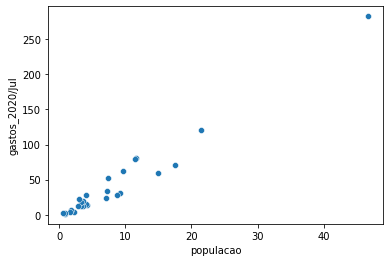

In [ ]:
import seaborn as sns

sns.scatterplot(data = gastos_e_populacao/1000000, x = "populacao", y= "gastos_2020/Jul")

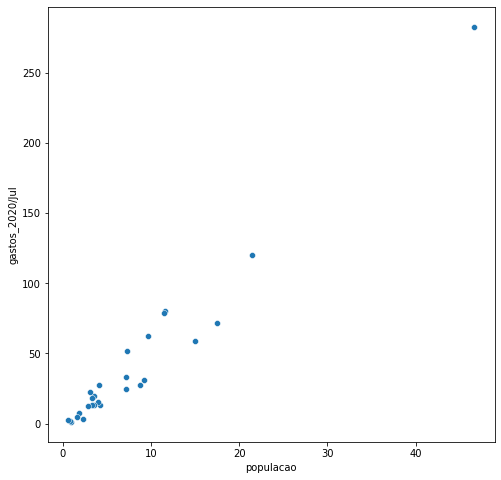

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = gastos_e_populacao/1000000, x = "populacao", y= "gastos_2020/Jul")

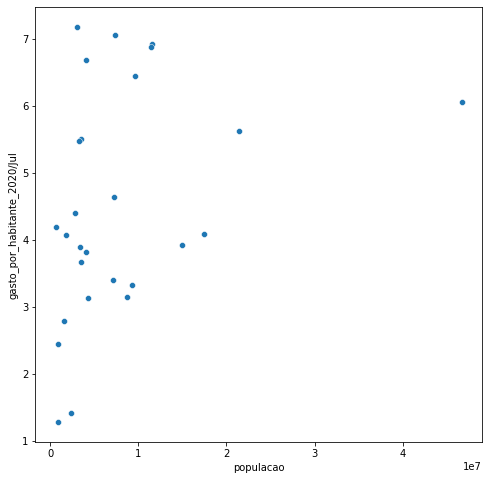

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = gastos_e_populacao, x = "populacao", y= "gasto_por_habitante_2020/Jul")

Existe uma tendência de maior gasto quanto maior a população. Dessa forma, visualizamos o dado que quremos sem utilizar dois eixos

#### Desafio 1: Ordernar por gasto por habitantes. Ordenar por habitantes

#### Desafio 2: Fazer os últimos gráficos para o mês anterior a este

#### Desafio 3: fazer os últimos gráficos com os dois no mesmo gráfico diferenciando por cor

In [ ]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao, "2020/Jun")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao, "2020/Mai")

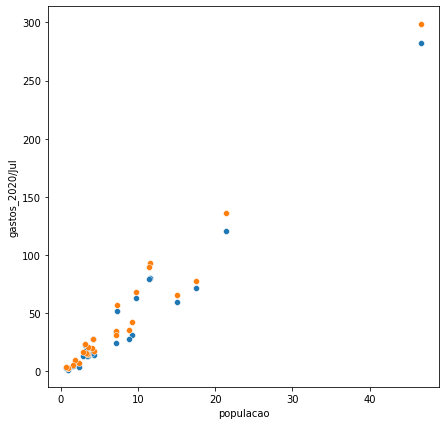

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao/1000000, x = "populacao", y = "gastos_2020/Jul")
sns.scatterplot(data=gastos_e_populacao/1000000, x = "populacao", y = "gastos_2020/Jun")

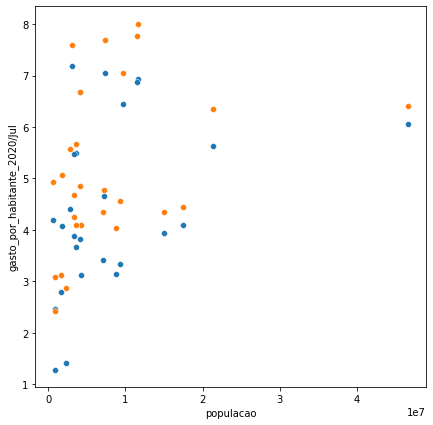

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao, x = "populacao", y = "gasto_por_habitante_2020/Jul")
sns.scatterplot(data=gastos_e_populacao, x = "populacao", y = "gasto_por_habitante_2020/Jun")

### Aula 3

Ticks, escalas e formatação de imagens

In [ ]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,177.09,192.32,178.60,216.95,215.05,212.89,212.67,214.04,215.21,214.14,216.06,208.97,192.13,213.47,195.78,239.32,221.17,231.78,223.93,224.07,248.01,224.05,238.94,225.48,210.61,229.09,221.60,241.40,229.82,250.79,...,263.47,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,88.93,99.02,83.68,100.24,91.83,97.29,95.72,100.05,98.97,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.83,105.49,99.67,103.36,107.84,104.34,100.53,101.94,99.54,107.74,103.14,111.07,106.09,115.49,...,136.72,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,106.03,120.54,111.73,118.59,122.12,110.66,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.07,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.45,132.58,124.86,134.62,127.17,126.17,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,83.19,95.15,93.17,94.42,94.23,86.42,91.60,85.79,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.12,95.84,103.03,98.55,94.37,96.91,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93
Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,43.01,60.87,40.66,52.75,48.90,51.17,57.23,53.49,51.22,48.48,48.67,49.69,44.41,55.99,44.82,54.46,78.12,56.01,51.44,53.86,57.87,53.74,52.37,50.22,50.89,74.01,61.11,55.32,55.81,59.07,...,64.52,74.32,69.85,73.15,74.54,68.73,73.08,69.26,67.32,72.34,65.02,74.39,74.52,79.26,75.91,77.49,78.78,72.84,79.14,73.95,70.69,79.47,73.80,74.92,76.67,82.44,78.19,87.98,83.31,81.15,82.25,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54


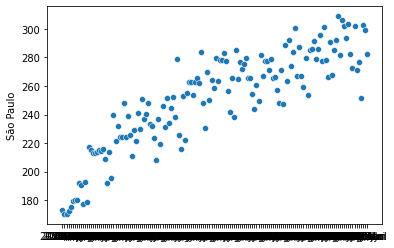

In [ ]:
sns.scatterplot(x = ordenado_por_total.columns, y = ordenado_por_total.loc["São Paulo"])

In [ ]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


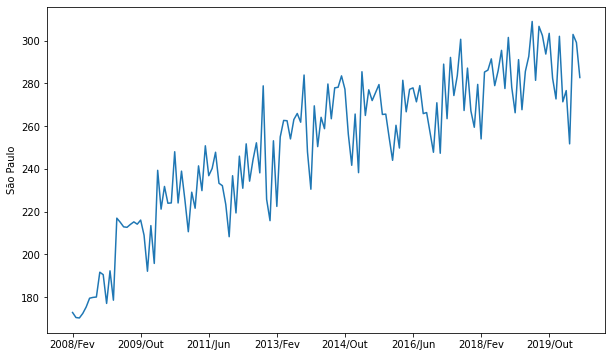

In [ ]:
plt.figure(figsize= (10,6))
ax = sns.lineplot(data = mensal, x = mensal.index, y = "São Paulo")
plt.xticks(rotation = 0)
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

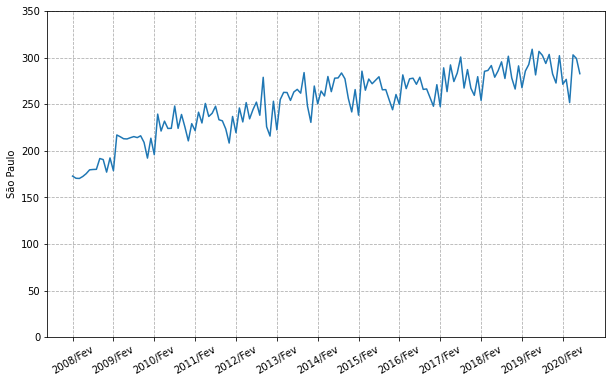

In [ ]:
plt.figure(figsize= (10,6))
ax = sns.lineplot(data = mensal, x = mensal.index, y = "São Paulo")
plt.xticks(rotation = 30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 0))
plt.ylim(0,350)
plt.grid(True, linestyle = "--")
plt.show()

#### Desafio 1: Use seu estado

#### Desafio 2: Formatar o eixo y com o StrMethodFormatter, colocar título e colocar título nos dois eixos. E alterar fonte (tamanho) dos títulos

### Aula 4

Trabalhando DateTime e Melt

In [ ]:
from datetime import date

date.today()

datetime.date(2021, 12, 23)

In [ ]:
# Transformando o indice em data mensal
meses = {"Jan": 1,
         "Fev": 2,
         "Mar": 3,
         "Abr": 4,
         "Mai": 5,
         "Jun": 6,
         "Jul": 7,
         "Ago": 8,
         "Set": 9,
         "Out": 10,
         "Nov": 11,
         "Dez": 12}


def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)

In [ ]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


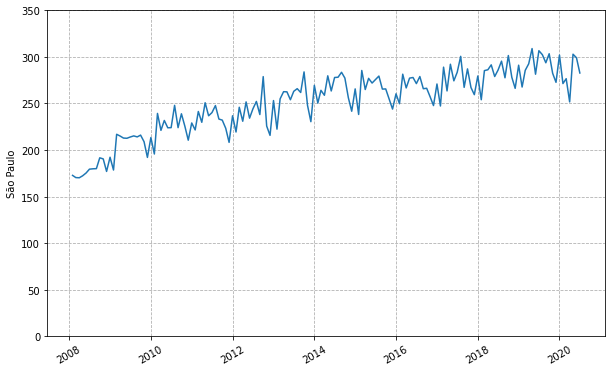

In [ ]:
plt.figure(figsize= (10,6))
ax = sns.lineplot(data = mensal, x = mensal.index, y = "São Paulo")
plt.xticks(rotation = 30)
# ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 0))
plt.ylim(0,350)
plt.grid(True, linestyle = "--")
plt.show()

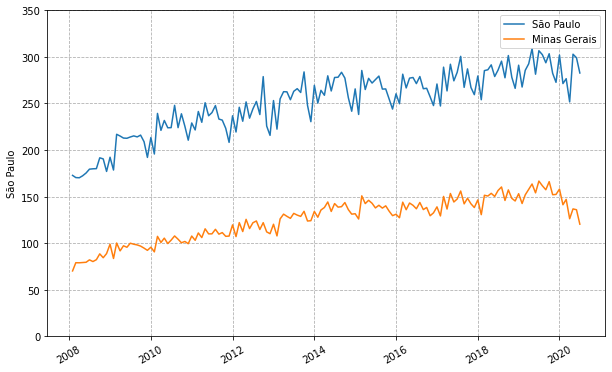

In [ ]:
# Chamei o lineplot duas vezes e ele plota as duas linhas. Mas e se houver muitas linhas?
plt.figure(figsize= (10,6))
ax = sns.lineplot(data = mensal, x = mensal.index, y = "São Paulo")
ax = sns.lineplot(data = mensal, x = mensal.index, y = "Minas Gerais")
plt.legend(["São Paulo", "Minas Gerais"])
plt.xticks(rotation = 30)
# ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 0))
plt.ylim(0,350)
plt.grid(True, linestyle = "--")
plt.show()

In [ ]:
# Primeira coisa que queremos fazer é tirar o index e depois vamos "derreter" a tabela
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)

# mudando o nome das colunas
mensal_aberto.columns = ["dia_mes_ano","uf","gasto"]

# Transformando a série em um datetime
mensal_aberto["dia_mes_ano"] = mensal_aberto["dia_mes_ano"].astype('datetime64')

In [ ]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


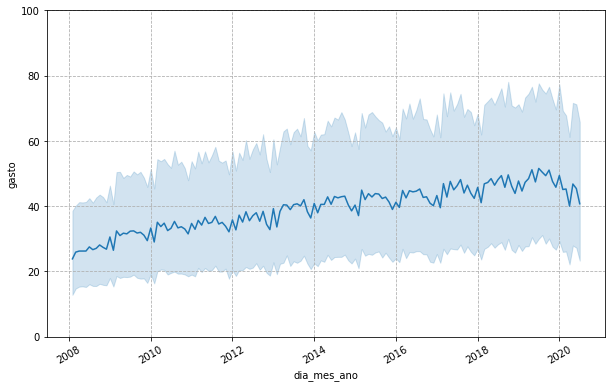

In [ ]:
# Chamei o lineplot duas vezes e ele plota as duas linhas. Mas e se houver muitas linhas?
plt.figure(figsize= (10,6))
ax = sns.lineplot(data = mensal_aberto, x = "dia_mes_ano", y = "gasto")
plt.xticks(rotation = 30)
# ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 0))
plt.ylim(0,100)
plt.grid(True, linestyle = "--")
plt.show()

# O lineplot agrega multiplos y, entregando a tendência central e entregando um intervalo de confiança em volta

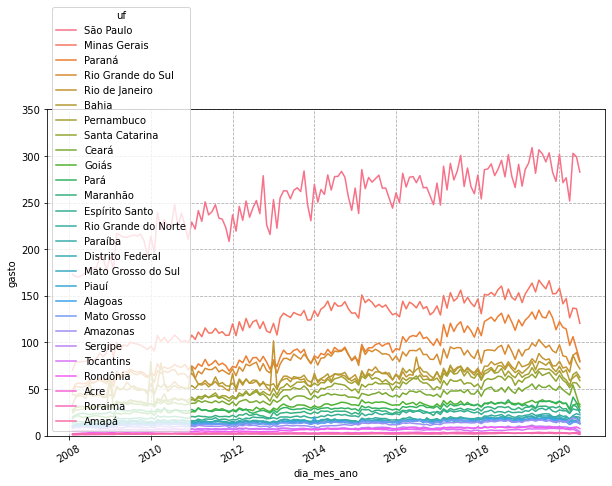

In [ ]:
# Chamei o lineplot duas vezes e ele plota as duas linhas. Mas e se houver muitas linhas?
plt.figure(figsize= (10,6))
ax = sns.lineplot(data = mensal_aberto, x = "dia_mes_ano", y = "gasto", hue = "uf")
plt.xticks(rotation = 30)
# ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 0))
plt.ylim(0,350)
plt.grid(True, linestyle = "--")
plt.show()

#### Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

#### Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

#### Desafio 03: Melhorar o gráfico com todos os estados

- muitos estados, escolha os estados
- palete de cores: https://seaborn.pydata.org/tutorial/color_palettes.html
- posição da legenda
- título e título dos eixos

### Aula 5

Manipulando data e gerando novas análises

In [ ]:
mensal_aberto["dia_mes_ano"].head()

0   2008-02-01
1   2008-03-01
2   2008-04-01
3   2008-05-01
4   2008-06-01
Name: dia_mes_ano, dtype: datetime64[ns]

In [ ]:
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008


In [ ]:
mensal_aberto.query('uf =="São Paulo"')

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008
...,...,...,...,...,...
145,2020-03-01,São Paulo,276.61,3,2020
146,2020-04-01,São Paulo,251.70,4,2020
147,2020-05-01,São Paulo,302.86,5,2020
148,2020-06-01,São Paulo,299.06,6,2020


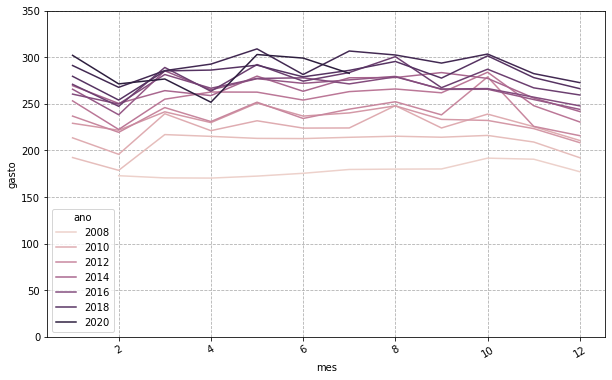

In [ ]:
# Plotamos um gráfico muito feio
plt.figure(figsize= (10,6))
ax = sns.lineplot(data = mensal_aberto.query('uf =="São Paulo"'), x = "mes", y = "gasto", hue = "ano")
plt.xticks(rotation = 30)
plt.ylim(0,350)
plt.grid(True, linestyle = "--")
plt.show()

In [ ]:
dias_por_mes = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31
}

In [ ]:
# Map também funciona por dicionário
# Calculado o gasto por dia

mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)

In [ ]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,6.17
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85


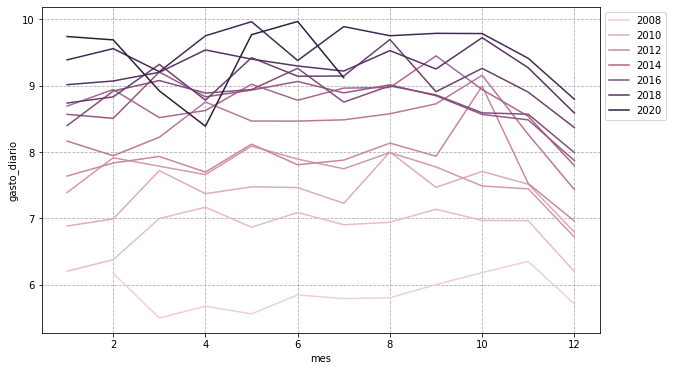

In [ ]:
plt.figure(figsize= (10,6))
ax = sns.lineplot(data = mensal_aberto.query('uf =="São Paulo"'), x = "mes", y = "gasto_diario", hue = "ano")
plt.grid(True, linestyle = "--")
plt.legend(bbox_to_anchor = (1,1), loc = "upper left")
plt.show()

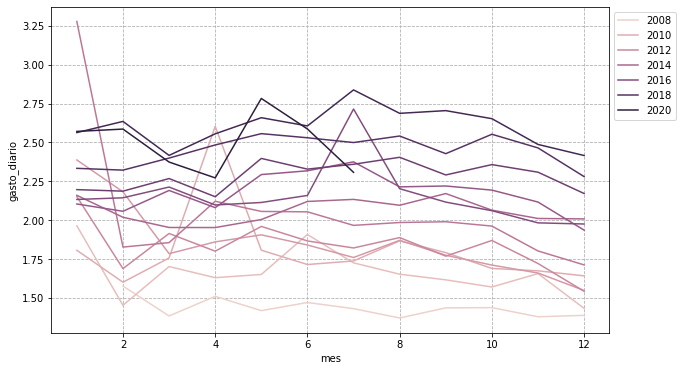

In [ ]:
plt.figure(figsize= (10,6))
ax = sns.lineplot(data = mensal_aberto.query('uf =="Rio de Janeiro"'), x = "mes", y = "gasto_diario", hue = "ano")
plt.grid(True, linestyle = "--")
plt.legend(bbox_to_anchor = (1,1), loc = "upper left")
plt.show()

#### Desafio 1: Cores melhores no gráfico de anos. Títulos, legenda, ticks de mes com nome bonitinho (ingles? Portugues?)

#### Desafio 2: Pegar dois estados de clima de diferentes (tipo região sudeste e norte) e plotar as diversas linhas deles. Comparar picos etc. Gerar gráficos separados e conjuntos

### Aula 6

Agrupando dados e analisando por categoria

In [ ]:
estado_a_analisar = mensal_aberto.query('uf == "São Paulo"')

In [ ]:
estado_a_analisar.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-02-01,São Paulo,172.83,2,2008,6.17
1,2008-03-01,São Paulo,170.48,3,2008,5.50
2,2008-04-01,São Paulo,170.28,4,2008,5.68
3,2008-05-01,São Paulo,172.40,5,2008,5.56
4,2008-06-01,São Paulo,175.42,6,2008,5.85


In [ ]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()

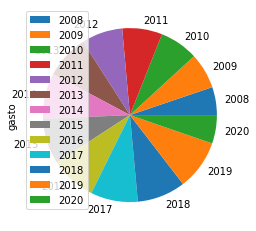

In [ ]:
gastos_por_ano.plot(kind = 'pie', y = 'gasto')

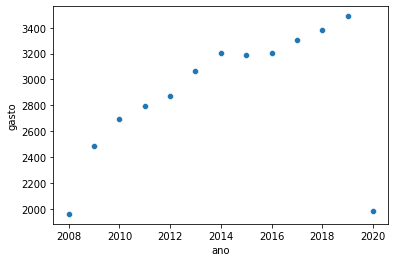

In [ ]:
sns.scatterplot(data = gastos_por_ano, x = gastos_por_ano.index, y = "gasto")

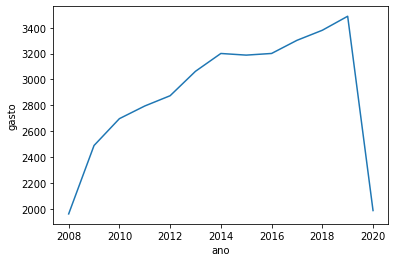

In [ ]:
sns.lineplot(data = gastos_por_ano, x = gastos_por_ano.index, y = "gasto")

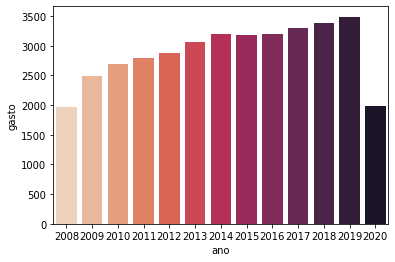

In [ ]:
sns.barplot(data = gastos_por_ano, x = gastos_por_ano.index, y = "gasto", palette = sns.color_palette("rocket_r", 13))

In [ ]:
estados = ["São Paulo", "Minas Gerais", "Pernambuco"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(["uf","ano"]).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Minas Gerais,2008,894.35,77,29.44
1,Minas Gerais,2009,1149.14,78,37.77
2,Minas Gerais,2010,1217.49,78,40.03
3,Minas Gerais,2011,1315.02,78,43.24
4,Minas Gerais,2012,1408.35,78,46.29


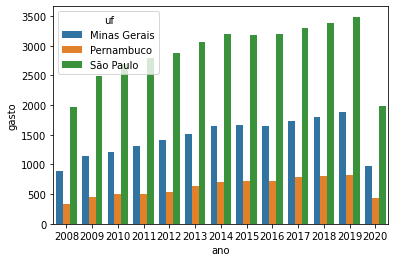

In [ ]:
sns.barplot(data = por_ano_dos_estados, x = "ano", y = "gasto", hue = "uf")

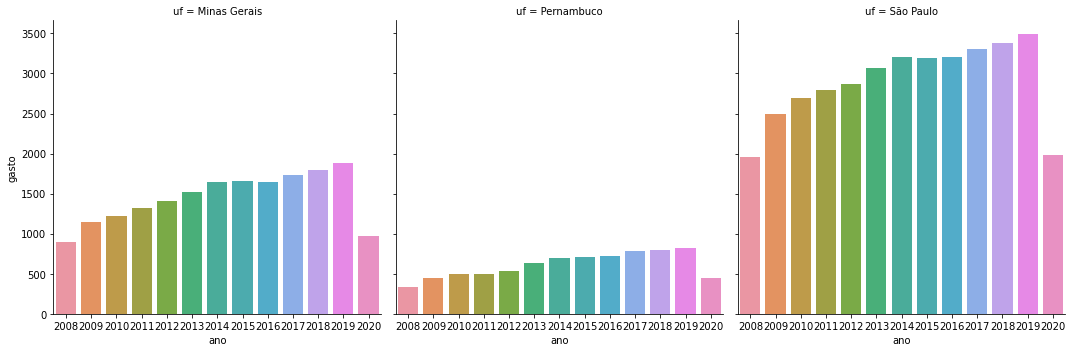

In [ ]:
sns.catplot(data = por_ano_dos_estados, y = "gasto", x = "ano", kind = "bar", col = "uf")

#### Desafio 01: Reordenar as cores pelo valor do eixo y.

#### Desafio 02: Explorar a documentação do Seaborn.

#### Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

#### Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.